In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Baca gambar
img = cv2.imread('Nama.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke HSV
hsv_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Salinan gambar untuk setiap warna
blue_faded = img_rgb.copy()
red_faded = img_rgb.copy()
green_faded = img_rgb.copy()

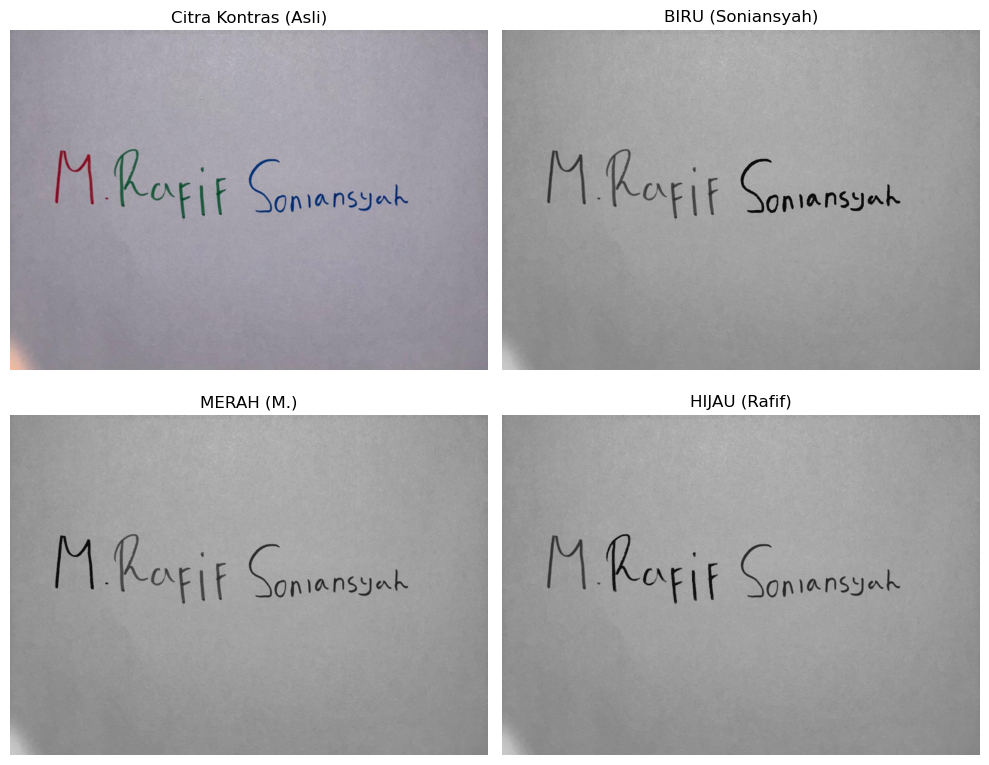

In [7]:
# === Deteksi Warna Biru ===
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
blue_faded[blue_mask > 0] = blue_faded[blue_mask > 0] // 2  # Efek pudar

# === Deteksi Warna Merah ===
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)
red_faded[red_mask > 0] = red_faded[red_mask > 0] // 2  # Efek pudar

# === Deteksi Warna Hijau ===
lower_green = np.array([40, 70, 70])
upper_green = np.array([80, 255, 255])
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
green_faded[green_mask > 0] = green_faded[green_mask > 0] // 2  # Efek pudar

# === Tampilkan Hasil ===
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Kontras (Asli)")
axes[0, 0].axis('off')

axes[0, 1].imshow(cv2.cvtColor(blue_faded, cv2.COLOR_RGB2GRAY), cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title("BIRU (Soniansyah)")
axes[0, 1].axis('off')

axes[1, 0].imshow(cv2.cvtColor(red_faded, cv2.COLOR_RGB2GRAY), cmap='gray', vmin=0, vmax=255)
axes[1, 0].set_title("MERAH (M.)")
axes[1, 0].axis('off')

axes[1, 1].imshow(cv2.cvtColor(green_faded, cv2.COLOR_RGB2GRAY), cmap='gray', vmin=0, vmax=255)
axes[1, 1].set_title("HIJAU (Rafif)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

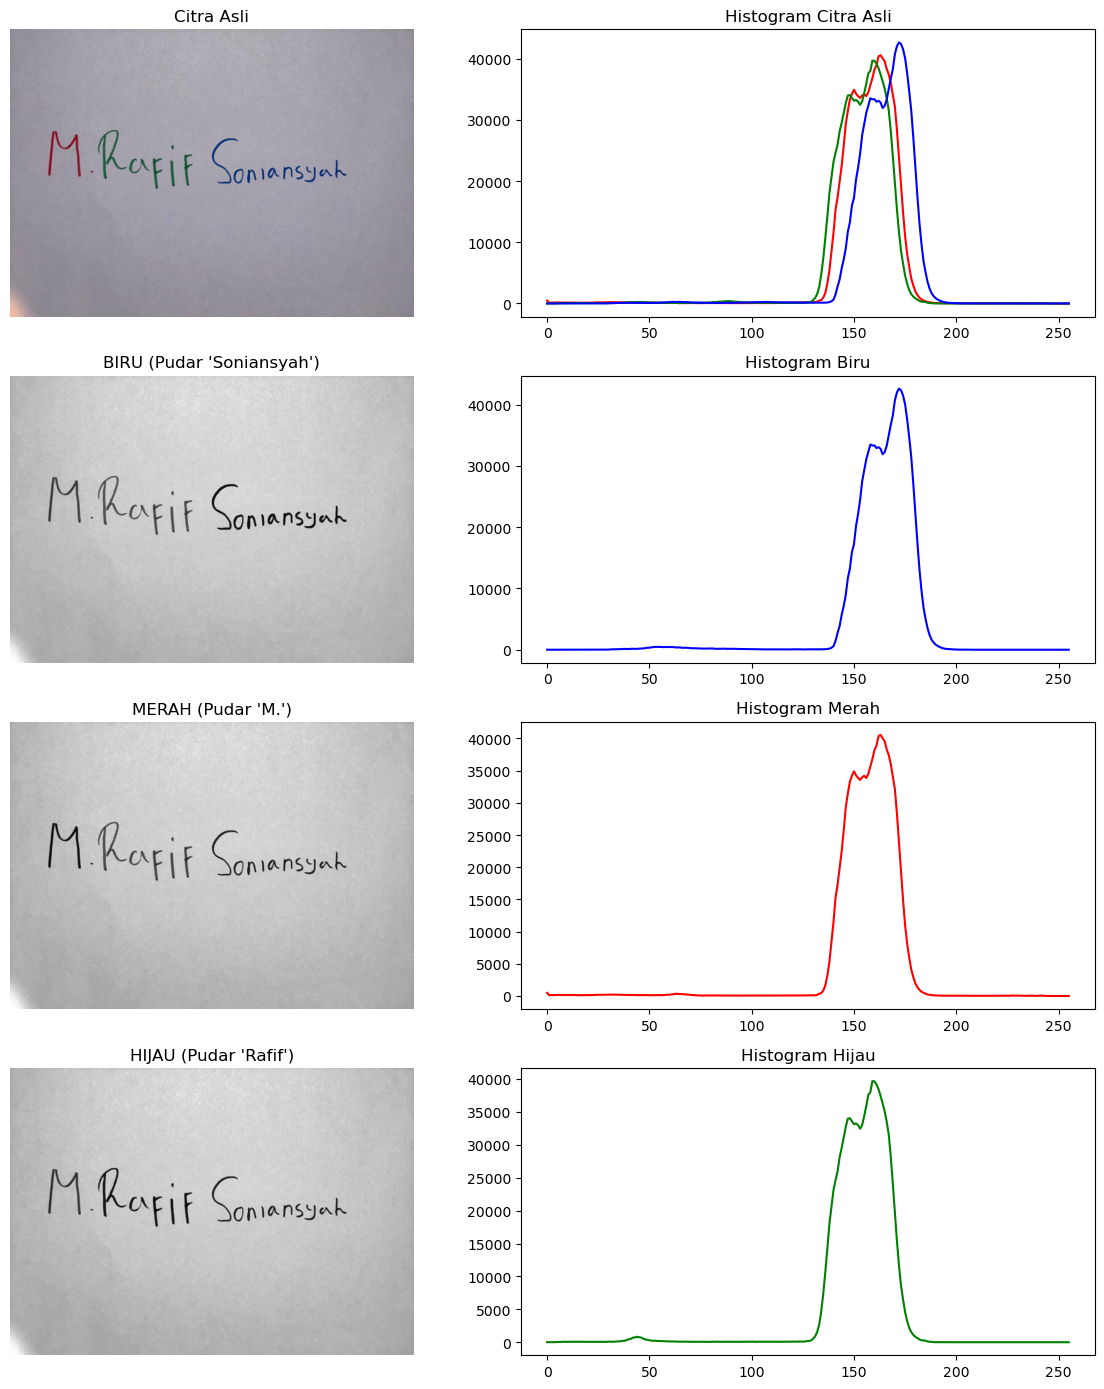

In [13]:
r, g, b = cv2.split(img_rgb)

# Konversi ke HSV untuk deteksi warna
hsv_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# --- Deteksi dan pudar BIRU ---
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)
blue_faded = img_rgb.copy()
blue_faded[blue_mask > 0] = blue_faded[blue_mask > 0] // 2

# --- Deteksi dan pudar MERAH ---
lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)
red_faded = img_rgb.copy()
red_faded[red_mask > 0] = red_faded[red_mask > 0] // 2

# --- Deteksi dan pudar HIJAU ---
lower_green = np.array([40, 50, 50])
upper_green = np.array([80, 255, 255])
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
green_faded = img_rgb.copy()
green_faded[green_mask > 0] = green_faded[green_mask > 0] // 2

# Plot hasil deteksi dan histogram
fig, axes = plt.subplots(4, 2, figsize=(12, 14))

# Gambar asli + histogram
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Asli")
axes[0, 0].axis('off')
for i, col in enumerate(('r', 'g', 'b')):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    axes[0, 1].plot(hist, color=col)
axes[0, 1].set_title("Histogram Citra Asli")

# Biru
axes[1, 0].imshow(cv2.cvtColor(blue_faded, cv2.COLOR_RGB2GRAY), cmap='gray')
axes[1, 0].set_title("BIRU (Pudar 'Soniansyah')")
axes[1, 0].axis('off')
blue_hist = cv2.calcHist([blue_faded], [2], None, [256], [0, 256])
axes[1, 1].plot(blue_hist, color='b')
axes[1, 1].set_title("Histogram Biru")

# Merah
axes[2, 0].imshow(cv2.cvtColor(red_faded, cv2.COLOR_RGB2GRAY), cmap='gray')
axes[2, 0].set_title("MERAH (Pudar 'M.')")
axes[2, 0].axis('off')
red_hist = cv2.calcHist([red_faded], [0], None, [256], [0, 256])
axes[2, 1].plot(red_hist, color='r')
axes[2, 1].set_title("Histogram Merah")

# Hijau
axes[3, 0].imshow(cv2.cvtColor(green_faded, cv2.COLOR_RGB2GRAY), cmap='gray')
axes[3, 0].set_title("HIJAU (Pudar 'Rafif')")
axes[3, 0].axis('off')
green_hist = cv2.calcHist([green_faded], [1], None, [256], [0, 256])
axes[3, 1].plot(green_hist, color='g')
axes[3, 1].set_title("Histogram Hijau")

plt.tight_layout()
plt.show()